# Workshop on sensor processing using machine learning
Course: Intelligent Sensing and Sense Making

Website: https://www.iss.nus.edu.sg/executive-education/course/detail/intelligent-sensing-and-sense--making/artificial-intelligence

Contact: Tian Jing

Email: tianjing@nus.edu.sg

## Objective
In this workshop, we will perform anomaly detection using autoencoder as reconstruction model

## Submission guideline
Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.


In [46]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
%matplotlib inline

print("Tensorflow version: ", tf.__version__)
print(tf.test.gpu_device_name())
# Your expected output will be '/device:GPU:0'

Tensorflow version:  2.5.0
/device:GPU:0


In [47]:
# Grant access to google drive.
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, paste it in the box, hit Enter

from google.colab import drive
drive.mount('/content/gdrive')

# Change working directory to be current folder
# os.chdir('/content/gdrive/My Drive/Your Folder Name/Your sub Folder Name')
os.chdir('/content/gdrive/My Drive/iss/issm/machine')
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data


# Exercise: Machine health monitoring

- Reference: R. Zhao, R. Yan, Z. Chen, K. Mao, P. Wang, R. Gao, Deep learning and its applications to machine health monitoring, Mechanical Systems and Signal Processing, Vol. 115, Jan. 2019, pp. 213-237.

- pdf paper, https://arxiv.org/abs/1612.07640
- code, https://github.com/ClockworkBunny/MHMS_DEEPLEARNING

In [48]:
# Load data 
x_train_pd = pd.read_csv("data/machine_sensor_train.csv",header=None)
x_train = x_train_pd.values

x_test_pd = pd.read_csv("data/machine_sensor_test.csv",header=None)
x_test = x_test_pd.values

print('Train shape: ', x_train.shape, 'Test shape:', x_test.shape)

Train shape:  (600, 70) Test shape: (300, 70)


In [49]:
# Configuration
hidden_node = 10 # new features
NUM_EPOCH = 10
BATH_SIZE = 24

In [50]:
def new_model():
  model = Sequential()
  model.add(Dense(hidden_node, activation='relu', input_shape=(x_train.shape[1], )))
  model.add(Dense(x_train.shape[1]))
  # Note that the model needs to reconstruct a signal with the same dimension as the input so that to calculate the MSE loss
  # Note that the input signal has a range [-1,1], so we cannot use ReLU in the last layer
  model.compile(optimizer='adam', loss='mse')
  return model

In [51]:
# Train the model
model = new_model()
model.summary()
hist = model.fit(x_train, x_train, epochs=NUM_EPOCH, batch_size=BATH_SIZE, shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                710       
_________________________________________________________________
dense_5 (Dense)              (None, 70)                770       
Total params: 1,480
Trainable params: 1,480
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4206
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3041
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.1797
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0981
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0621
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 7/10
25/25 [======================

In [52]:
thre = 10 # A manually-defined error threshold

def test_record(sample_index):
  # Step 1: Select the test sample (such as the 0-th sample)
  test_data_orig = x_test[sample_index:sample_index+1,:]
  print(test_data_orig.shape)

  # Step 2: Perform prediction using the trained autoencoder model
  test_data_predict = myModel.predict(test_data_orig)

  # Step 3: Calculate the reconstruction error and make decision on anomaly detection
  error = np.linalg.norm(test_data_orig - test_data_predict, axis=1)[0]

  return test_data_predict, error

In [53]:
sample_index = 0 # Select a test sample/record
_,error = test_record(sample_index)

if (error>thre):
  print('Anomaly detected: the reconstruction error is %.2f' % error)
else:
  print('Normal detected: the reconstruction error is %.2f' % error)

(1, 70)
Normal detected: the reconstruction error is 2.16


$\color{red}{\text{Q1. Complete the code to build autoencoder model for abnormal machine sensory signal detection.}}$

Tasks

- Perform the test on x_test and determine the test data (row index) with the LARGEST reconstruction error based on your trained model
- Plot the data that is found by your model

In [54]:
# Provide your code to Q1 here
c = 0
temp1 = ''
temp2 = 10000

for sample_index in range(x_test.shape[0]):
  _,error = test_record(sample_index)
  if(error>thre):
    c=c+1
  if(error<temp2):
    temp2 = error
    temp1 = sample_index

(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)
(1, 70)


In [55]:
print('Number of Anomalies in data (based on user defined threshold): ',c)
print('LARGEST reconstruction error: ',temp2)
print('test data (row index) with the LARGEST reconstruction error: ',temp1)

Number of Anomalies in data (based on user defined threshold):  0
LARGEST reconstruction error:  0.7081571674593442
test data (row index) with the LARGEST reconstruction error:  170


In [56]:
test_data_predict, error = test_record(temp1)

(1, 70)


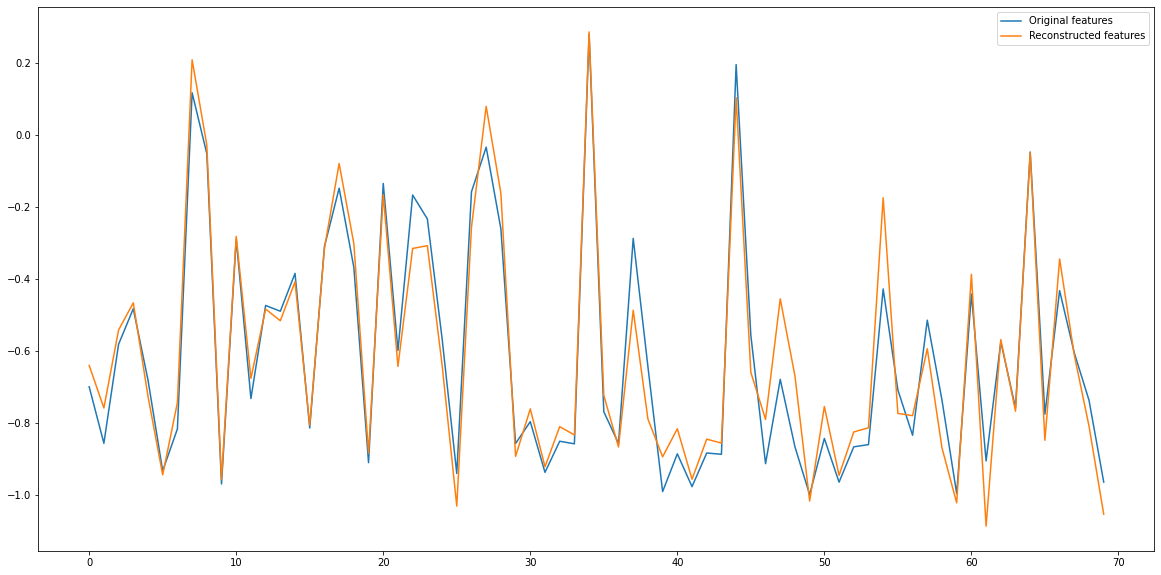

In [57]:
plt.figure(figsize=(20,10))
plt.plot(x_test[170],label='Original features')
plt.plot(test_data_predict[0],label='Reconstructed features')
plt.legend()
plt.show()

$\color{red}{\text{Q2. Describe one use case of anomaly detection, including objective, requirement of training data (if any).}}$

In [58]:
# Provide your solution to Q2 here. (no need programming)
# Objective - Check anomalies in AQI (Air Quality Index) monitoring for each day
# Requirement of training data - Hourly AQI Readings (columns) for each day (record)

**Once you finish the workshop, rename your .ipynb file to your name, and submit your .ipynb file into LumiNUS.**

Have a nice day!